# Introduction to Image Processing

Mojdeh Rastgoo - Guillaume Lemaitre - Desire Sidibe

## **Spatial Filtering and de-noising**

The modules which are commonly used are entered in the following cell.

In [1]:
%matplotlib inline
#%pprint off

# Matplotlib library
import matplotlib.pyplot as plt
from matplotlib import cm

# Numpy library
import numpy as np

from skimage import io 
from skimage import img_as_ubyte
from skimage import img_as_float
from skimage import color 

# import the function to add some noise
from skimage.util import random_noise


In [2]:
from skimage import data
from skimage.morphology import disk
from skimage.filters.rank import mean


Path = './images/'
lena_im = io.imread(Path.__add__('lena-grey.bmp'))
lena_im = img_as_float(lena_im)

## Smoothing

### Mean filter 
Smooth the lena image, by mean filter, using different disk circles with radius of $ r = 1, 3, 5, 7$

Use [`skimage.filter.rank.mean`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean) and [`skimage.morphology.disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) function 

C:\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


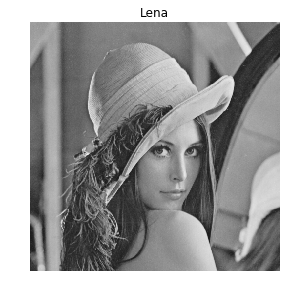

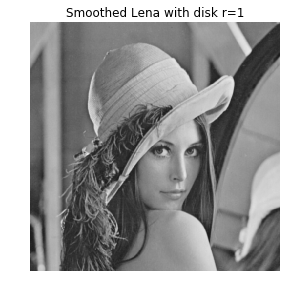

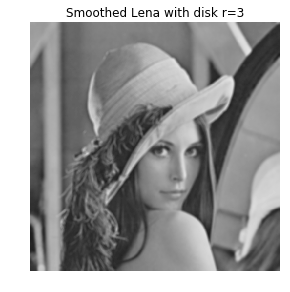

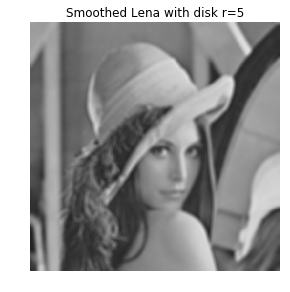

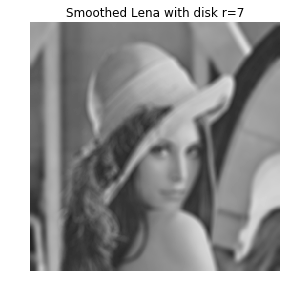

In [3]:
# Original image
plt.figure()
imgplot = io.imshow(lena_im)
plt.axis('off')
plt.title('Lena')

# Smooth with disk r=1
plt.figure()
lena_avg = mean(lena_im, disk(1))
imgplot = io.imshow(lena_avg)
plt.axis('off')
plt.title('Smoothed Lena with disk r=1')

# Smooth with disk r=3
plt.figure()
lena_avg = mean(lena_im, disk(3))
imgplot = io.imshow(lena_avg)
plt.axis('off')
plt.title('Smoothed Lena with disk r=3')

# Smooth with disk r=5
plt.figure()
lena_avg = mean(lena_im, disk(5))
imgplot = io.imshow(lena_avg)
plt.axis('off')
plt.title('Smoothed Lena with disk r=5')

# Smooth with disk r=7
plt.figure()
lena_avg = mean(lena_im, disk(7))
imgplot = io.imshow(lena_avg)
plt.axis('off')
plt.title('Smoothed Lena with disk r=7')

### Filtering using convolution 
Once again apply the mean fiter, howver instead of using `filter.rank` make your mean mask having the same size as the last filter you applied and use convolution to apply the filter. 

The function [`ndimage.filters.convolve`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.filters.convolve.html#scipy.ndimage.filters.convolve) from `scipy` allows to compute the convolution between a mask (filter) and an image.

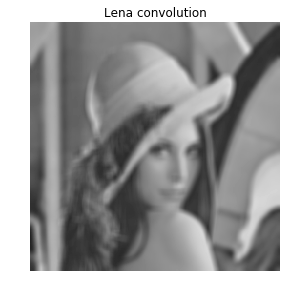

In [4]:
from scipy import ndimage
k = np.ones((14,14))
k = k/ (14*14)

lena_colvo=ndimage.convolve(lena_im, k)
plt.figure()
imgplot = io.imshow(lena_colvo)
plt.axis('off')
plt.title('Lena convolution')

Any filtering will work is a similar manner. Only the mask (filter) will change and will define the nature of the filtering.

### Common spatial filtering

In this section, you will learn about spatial filters which are commonly used in image processing. These filters were already implemented in `skimage` and can be directly used without applying the previous processing.

The modules `filters` and `filters.rank` implement well known filters.

In [5]:
from skimage import filters

#####  First-order edge detector

You already saw during the lecture the following edge detectors: (i) Roberts, (ii) Prewitt, and (iii) Sobel.
All these operators are an approximation of the first derivative. They are highly sensitive to noise even if Prewitt and Sobel have a smoothing process embedded.

Scharr opearator as an improved version of Sobel such that the operator provides a rotational symmetry.

The following functions are defined in `skimage`: `filters.roberts`, `filters.prewitt`, `filters.sobel`, and `filters.scharr`. 

**Apply these different filters on Leaves image (`leaves.jpg`).**

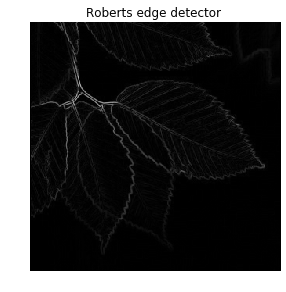

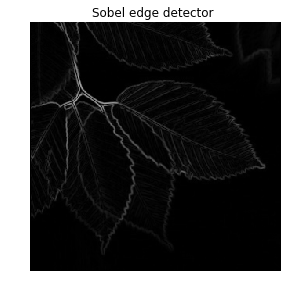

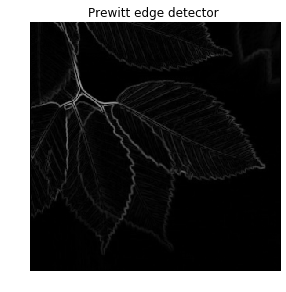

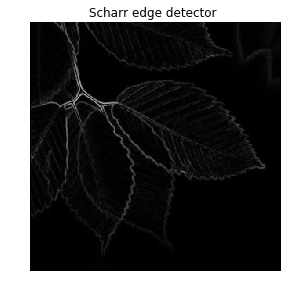

In [6]:
from scipy import misc

# Read leave image
leave_img = io.imread(Path.__add__('leaves.jpg'),flatten=True)
leave_img = color.rgb2gray(leave_img)
leave_img = img_as_float(leave_img)

# Perform filters
edge_roberts = filters.roberts(leave_img)
edge_sobel = filters.sobel(leave_img)
edge_prewitt = filters.prewitt(leave_img)
edge_scharr = filters.scharr(leave_img)

# Display results
plt.figure()
imgplot = io.imshow(edge_roberts)
plt.axis('off')
plt.title('Roberts edge detector ')

plt.figure()
imgplot = io.imshow(edge_sobel)
plt.axis('off')
plt.title('Sobel edge detector ')

plt.figure()
imgplot = io.imshow(edge_prewitt)
plt.axis('off')
plt.title('Prewitt edge detector ')

plt.figure()
imgplot = io.imshow(edge_scharr)
plt.axis('off')
plt.title('Scharr edge detector ')

##### Second-order edge detector

The second order edge detector is using the Laplace kernel as seen in lectures.

The `skimage` toolbox does not provide any implementation of this filter (yet). The `scipy` toolbox, however, does through the function `ndimage.filters.laplace`.

**Apply this filter on the Leaves image.**

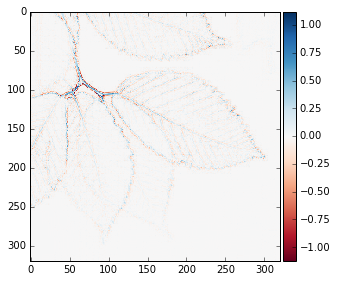

In [7]:
import scipy.ndimage.filters as scfilters
edge_laplace = scfilters.laplace(leave_img)
plt.figure(4)
imgplot = io.imshow(edge_laplace)

## Denoising filters

Different filters can be applied in the spatial domain to remove the noise.
These filters can be found in the module `filters.rank`.

Before to start denoising the image, we need to generate some corrupted image using the noise generator from `skimage`.
For this purpose, we will use the function `util.random_noise`.

**Generate corrupted some Lena images with gaussian noise, salt & peppers noise, and speckle noise. Keep the default parameters.**

In [8]:
from skimage import util

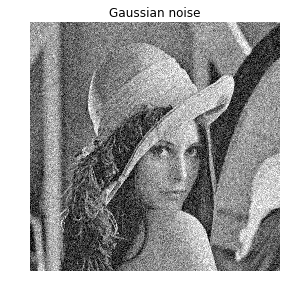

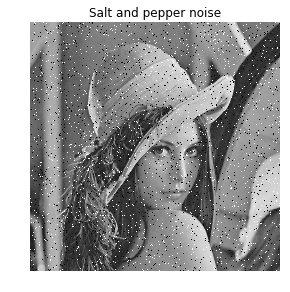

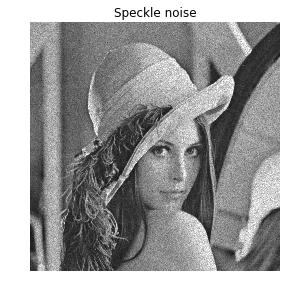

In [9]:
# Corrupt Lena
lena_gaussian = util.random_noise(lena_im, mode='gaussian')
lena_sp = util.random_noise(lena_im, mode='s&p')
lena_speckle = util.random_noise(lena_im, mode='speckle')

# Show the different corrupted Lena
plt.figure()
io.imshow(lena_gaussian)
plt.axis('off')
plt.title('Gaussian noise')          

plt.figure()
io.imshow(lena_sp)
plt.axis('off')
plt.title('Salt and pepper noise')

plt.figure()
io.imshow(lena_speckle)
plt.axis('off')
plt.title('Speckle noise')

**Apply `median`, `mean` and `alpha-trimmed` mean filter on different corrupted Lena images with the mask corresponding to disk 1 and 3.**

 `alpha-trimmed` ([`mean_percentile`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean_percentile)) mean filter works similar to normal mean filter. However, it considers only the grey values inside a specific range.

** mean filter: ** 

C:\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


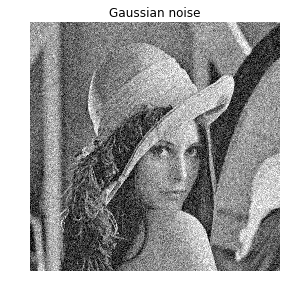

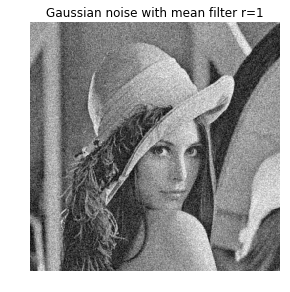

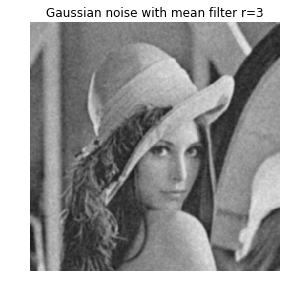

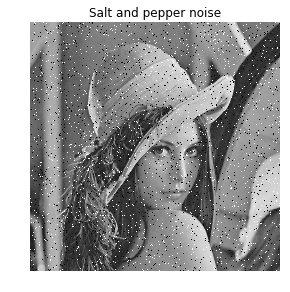

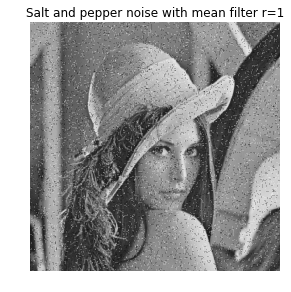

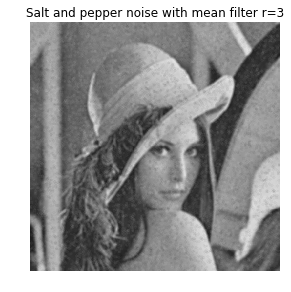

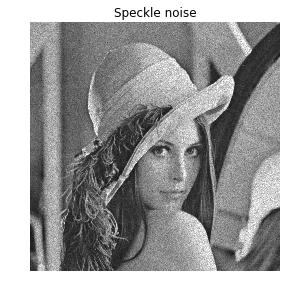

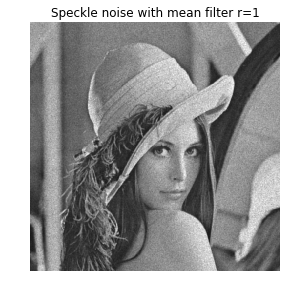

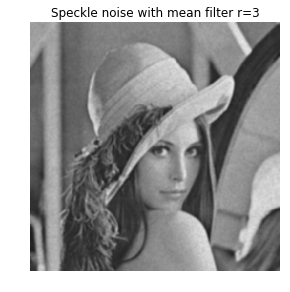

In [10]:
# Gaussian noise
plt.figure()
imgplot = io.imshow(lena_gaussian)
plt.axis('off')
plt.title('Gaussian noise')

plt.figure()
lena_mean_1 = mean(lena_gaussian, disk(1))
imgplot = io.imshow(lena_mean_1)
plt.axis('off')
plt.title('Gaussian noise with mean filter r=1')

plt.figure()
lena_mean_3 = mean(lena_gaussian, disk(3))
imgplot = io.imshow(lena_mean_3)
plt.axis('off')
plt.title('Gaussian noise with mean filter r=3')


# Salt and pepper noise
plt.figure()
imgplot = io.imshow(lena_sp)
plt.axis('off')
plt.title('Salt and pepper noise')

plt.figure()
lena_mean_1 = mean(lena_sp, disk(1))
imgplot = io.imshow(lena_mean_1)
plt.axis('off')
plt.title('Salt and pepper noise with mean filter r=1')

plt.figure()
lena_mean_3 = mean(lena_sp, disk(3))
imgplot = io.imshow(lena_mean_3)
plt.axis('off')
plt.title('Salt and pepper noise with mean filter r=3')


# Speckle noise
plt.figure()
imgplot = io.imshow(lena_speckle)
plt.axis('off')
plt.title('Speckle noise')

plt.figure()
lena_mean_1 = mean(lena_speckle, disk(1))
imgplot = io.imshow(lena_mean_1)
plt.axis('off')
plt.title('Speckle noise with mean filter r=1')

plt.figure()
lena_mean_3 = mean(lena_speckle, disk(3))
imgplot = io.imshow(lena_mean_3)
plt.axis('off')
plt.title('Speckle noise with mean filter r=3')

** alpha-trimmed mean filter: **

Apply this function on the different corrupted Lena by considering the gray value in the range [0.05, 0.95].

C:\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


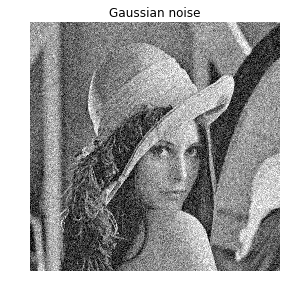

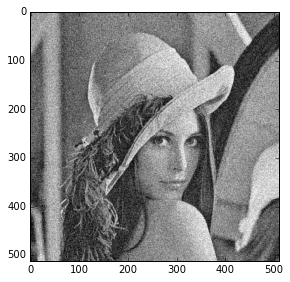

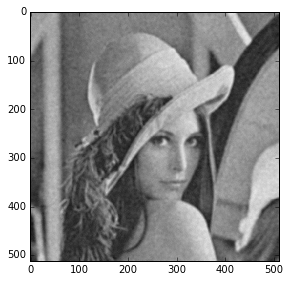

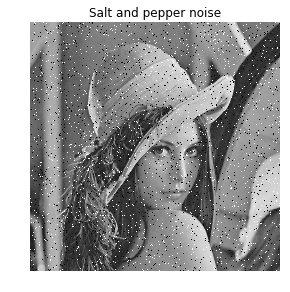

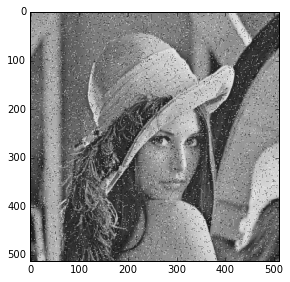

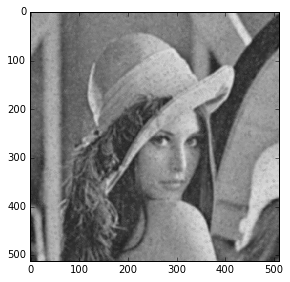

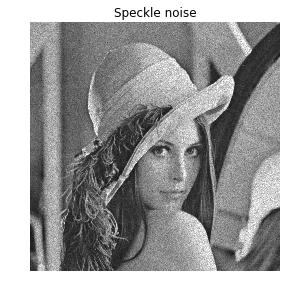

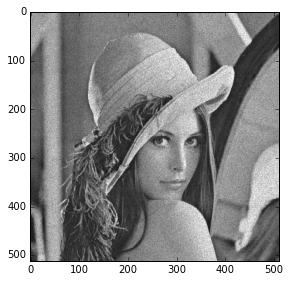

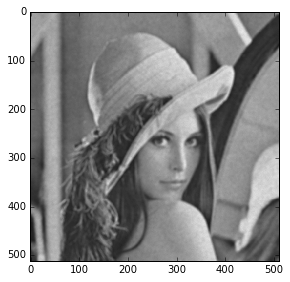

In [11]:
from skimage.filters.rank import mean_percentile

# Gaussian noise
plt.figure(1)
imgplot = io.imshow(lena_gaussian)
plt.axis('off')
plt.title('Gaussian noise')

plt.figure(2)
lena_mean_1 = mean_percentile(lena_gaussian, disk(1))
imgplot = io.imshow(lena_mean_1)

plt.figure(3)
lena_mean_3 = mean_percentile(lena_gaussian, disk(3))
imgplot = io.imshow(lena_mean_3)


# Salt and pepper noise
plt.figure(4)
imgplot = io.imshow(lena_sp)
plt.axis('off')
plt.title('Salt and pepper noise')

plt.figure(5)
lena_mean_1 = mean_percentile(lena_sp, disk(1))
imgplot = io.imshow(lena_mean_1)

plt.figure(6)
lena_mean_3 = mean_percentile(lena_sp, disk(3))
imgplot = io.imshow(lena_mean_3)


# Speckle noise
plt.figure(7)
imgplot = io.imshow(lena_speckle)
plt.axis('off')
plt.title('Speckle noise')

plt.figure(8)
lena_mean_1 = mean_percentile(lena_speckle, disk(1))
imgplot = io.imshow(lena_mean_1)

plt.figure(9)
lena_mean_3 = mean_percentile(lena_speckle, disk(3))
imgplot = io.imshow(lena_mean_3)

** median filter: **

C:\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


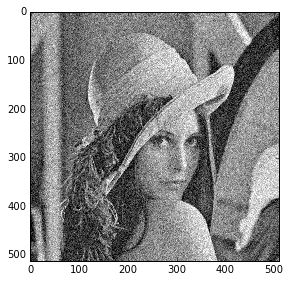

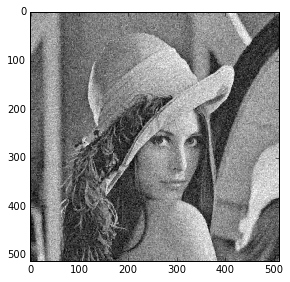

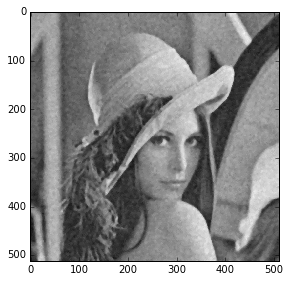

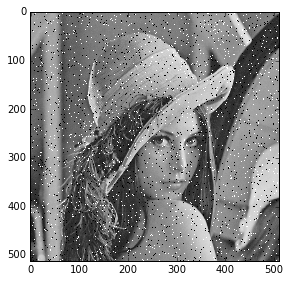

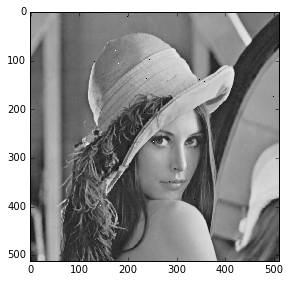

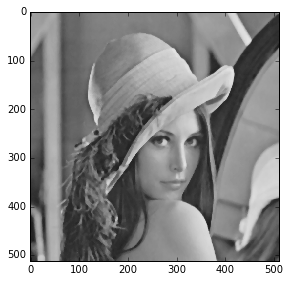

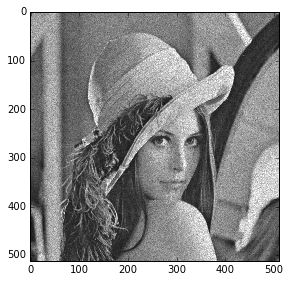

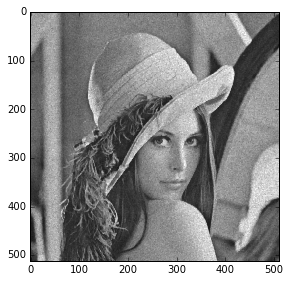

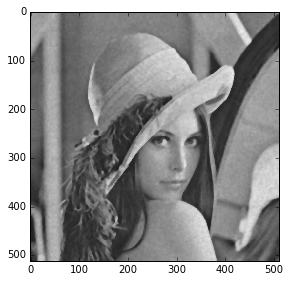

In [12]:
from skimage.filters.rank import median


# Gaussian noise
plt.figure(1)
imgplot = io.imshow(lena_gaussian)

plt.figure(2)
lena_mean_1 = median(lena_gaussian, disk(1))
imgplot = io.imshow(lena_mean_1)

plt.figure(3)
lena_mean_3 = median(lena_gaussian, disk(3))
imgplot = io.imshow(lena_mean_3)


# Salt and pepper noise
plt.figure(4)
imgplot = io.imshow(lena_sp)

plt.figure(5)
lena_mean_1 = median(lena_sp, disk(1))
imgplot = io.imshow(lena_mean_1)

plt.figure(6)
lena_mean_3 = median(lena_sp, disk(3))
imgplot = io.imshow(lena_mean_3)


# Speckle noise
plt.figure(7)
imgplot = io.imshow(lena_speckle)

plt.figure(8)
lena_mean_1 = median(lena_speckle, disk(1))
imgplot = io.imshow(lena_mean_1)

plt.figure(9)
lena_mean_3 = median(lena_speckle, disk(3))
imgplot = io.imshow(lena_mean_3)

## Sharpening

Use the `railway` image and sharpen the image using laplacian fitering.

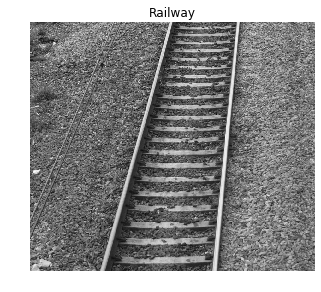

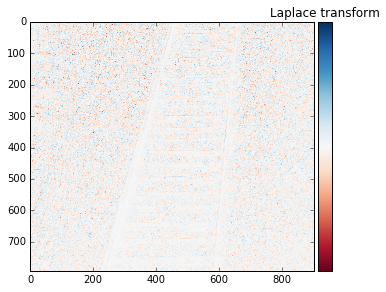

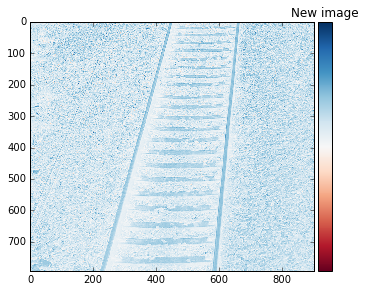

In [13]:
# Read image
railway_img = io.imread(Path.__add__('railway.jpg'),flatten=True)
railway_img = color.rgb2gray(railway_img)
railway_img = img_as_float(railway_img)

# Perform Laplace filter
edge_laplace = scfilters.laplace(railway_img)
new_image = railway_img-edge_laplace;

# Display
plt.figure()
imgplot = io.imshow(railway_img)
plt.axis('off')
plt.title('Railway')

plt.figure()
imgplot = io.imshow(edge_laplace)
plt.axis('off')
plt.title('Laplace transform')

plt.figure()
imgplot = io.imshow(new_image)
plt.axis('off')
plt.title('New image')

## Hough transform

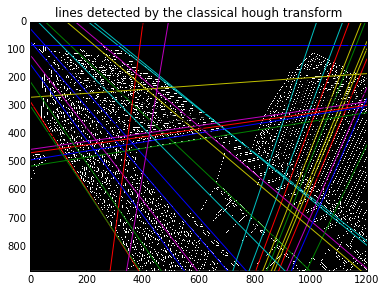

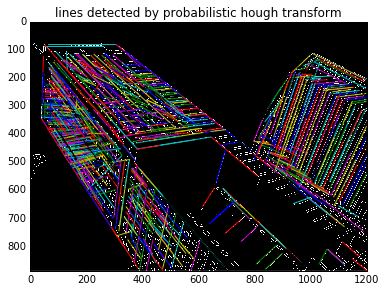

In [14]:
from skimage import feature
from skimage.transform import hough_line
from skimage.transform import hough_line_peaks
from skimage.transform import probabilistic_hough_line

# Read building
playImage = io.imread('images/building.jpg')
playImage = color.rgb2grey(playImage)

# ======================================================================================
# Classical Hough Transform
# ======================================================================================

# Compute Hough Transform
def ComputeHough(im, sig = 3):
    # Find the edge-pixels in the input image
    im_edges = feature.canny(im, sigma = sig)
    
    # Get the hough-transform accumulator array
    hspace, angles, dists = ComputeHough(im_edges)
    
    # Find peaks in the hough space
    hspace, angles, dists = hough_line_peaks(hspace, angles, dists)
    
    # Return the magnitude of peaks in hough space, and the angles and dists of peaks
    return(hspace, angles, dists)


hspace, angles, dists = ComputeHough(playImage)
plt.figure()
io.imshow(feature.canny(playImage, sigma = 3))
plt.title('Classical hough transform')

# Determine the width of the image
imdim = playImage.shape
cols = imdim[1]
rows = imdim[0]
x = np.linspace(0, cols, num = 1000)

# Plot the lines returned by the Hough-trans function
for i in range(0, len(angles)):
    theta = angles[i]
    r = dists[i]
    m = -1.0/np.tan(theta)
    c = r/np.sin(theta)
    
    y = m*x + c 
    
    plt.plot(x, y)

plt.axis((0, cols, rows, 0))
plt.show()

# ======================================================================================
# Prob Hough Transform
# ======================================================================================

lines = probabilistic_hough_line(feature.canny(playImage, sigma = 3))

#show the image before overlaying lines
plt.figure()
io.imshow(feature.canny(playImage, sigma = 3))
plt.title('lines detected by probabilistic hough transform')

for line in lines:
    start = line[0]
    x0 = start[0]
    y0 = start[1]
    
    end = line[1]
    x1 = end[0]
    y1 = end[1]
    
    x = np.linspace(x0, x1, num = 1000)
    m = 1.0*(y1 - y0)/(x1 - x0)
    c = y1 - m*x1
    y = m*x + c
    
    plt.plot(x, y)

plt.axis((0, cols, rows, 0))
plt.show()

** Define your Hough_trans function which finds the lines within an image** 

you can use either `hough_line` and `hough_line_peaks` or `probabilistic_hough_line` from [`skimage.transform`](http://scikit-image.org/docs/dev/api/skimage.transform.html). 

search a bit to know the difference between `probablistic_hough_line` and `hough_line`

Or `HoughLines` and `HoughLinesP` from [`cv2`](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html)


Test your function on `railway` and `building` images. 

**Note : use `skimage.feature.canny` (`cv2.canny`) edge detector to find the primary edges**